In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [3]:
#define image1 here
image1 = np.array([[150, 151, 153, 155, 156, 155, 154],
          [150, 151, 153, 155, 156, 155, 154],
          [150, 151, 153, 155, 156, 155, 154],
          [150, 151, 153, 155, 156, 155, 154],
          [150, 151, 153, 155, 156, 155, 154]],np.float32)



In [4]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    return(hist)

Text(0.5, 1.0, 'histogram')

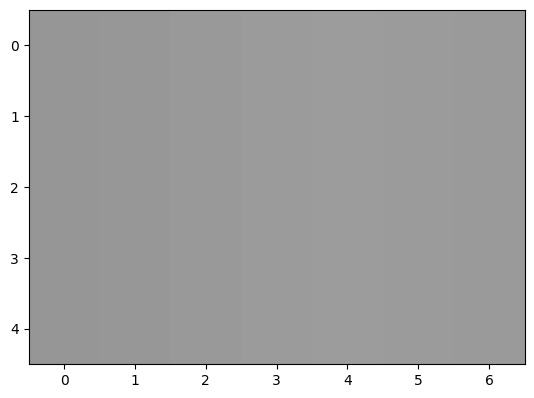

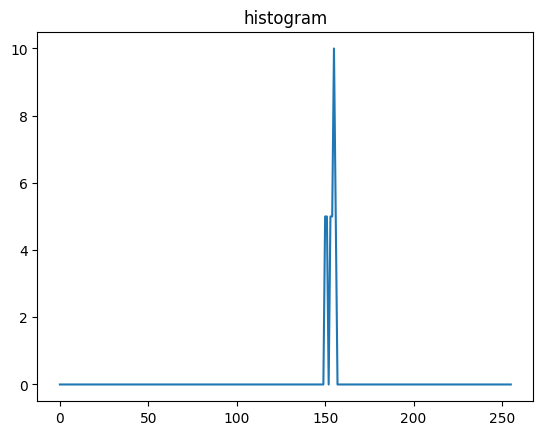

In [5]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [6]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  n=0
  m=0
  max = output_image.max()
  min = output_image.min()
  for i in output_image:
    m=0
    for j in i:
      output_image[n,m] = round(((j - min) / (max - min)) * 255) #the formula for histogram stretching
      m+=1
    n +=1
  # End
  return output_image


Text(0.5, 1.0, 'new histogram')

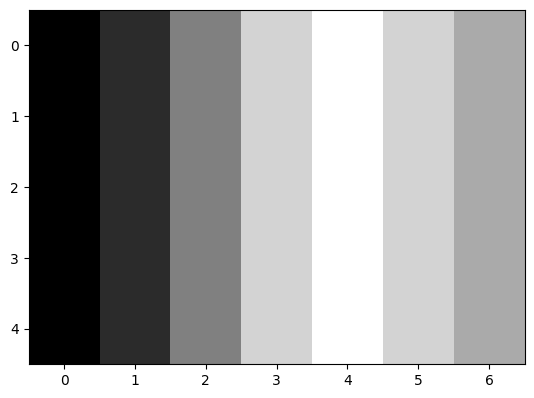

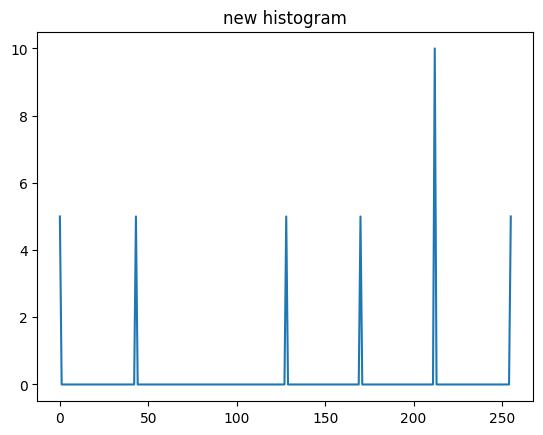

In [7]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


Text(0.5, 1.0, 'image2 original histogram')

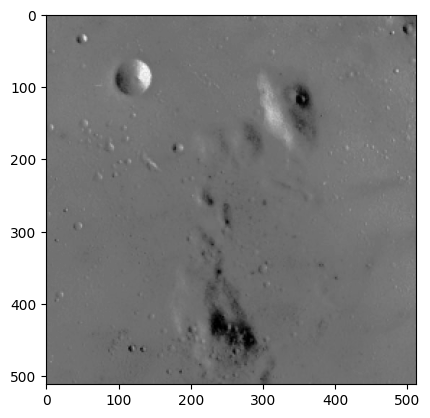

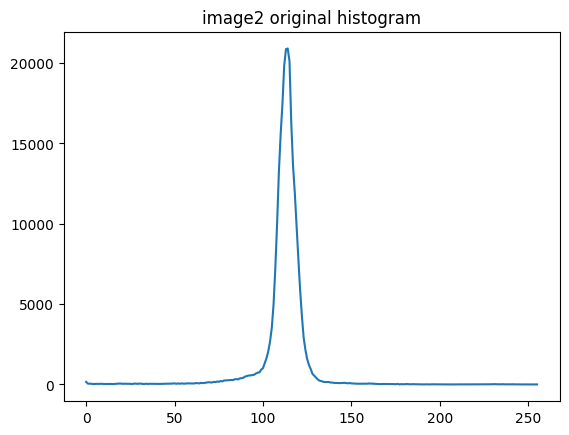

In [8]:
# first read the image and show it.(image2)
image2=cv2.imread("Q3_image/image2.jpg",0) #Load image 
plt.imshow(image2,cmap='gray')
plt.figure()
plt.plot(calc_hist(image2))
plt.title('image2 original histogram')


Text(0.5, 1.0, 'image2 histogram')

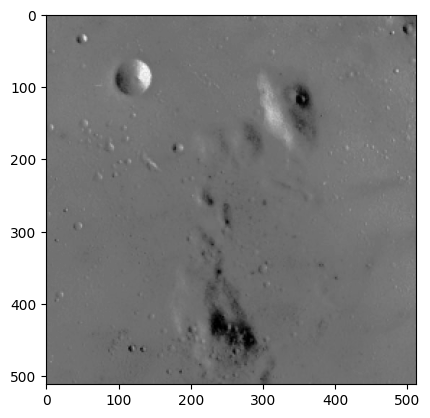

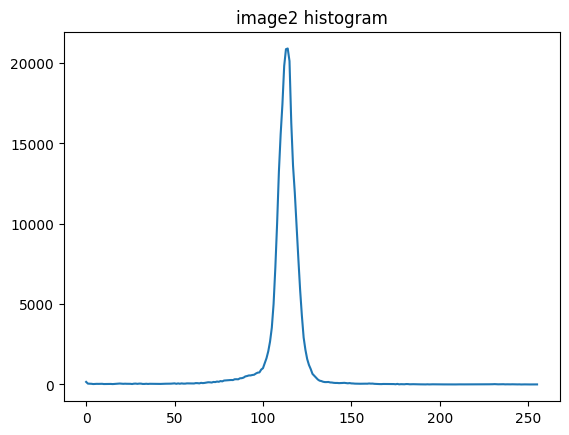

In [9]:
#use stretch function to improve quality of the image and show it
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('image2 histogram')


In [14]:
#define new function that can improve this image 

def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  sorted_image = np.sort(output_image.flatten()) #flatten the image so we can get one percent
  n_f1 = round(sorted_image.size / 100) #the index of first one percent pixel
  f1 = sorted_image[n_f1] #first one percent pixel
  n_f99 = round((sorted_image.size * 99) / 100) #the index of last one percent pixel
  f99 = sorted_image[n_f99] #last one percent pixel
  n=0
  m=0
  for i in output_image:
    m=0
    for j in i:  
      value = ((int(j) - f1) / (f99 - f1)) * 255 #the formula for histogram clipping
      if value>255:
        output_image[n,m] = 255
      elif value<0:
        output_image[n,m] = 0
      else:
        output_image[n,m] = round(value)
      m+=1
    n +=1

  return output_image


Text(0.5, 1.0, 'image2 histogram')

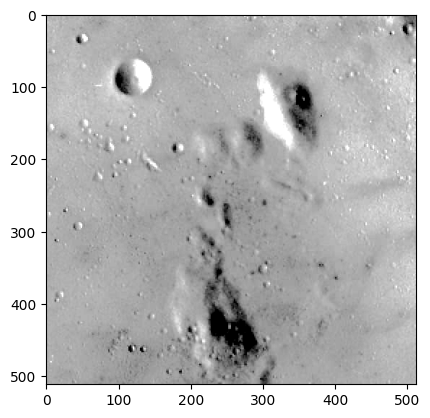

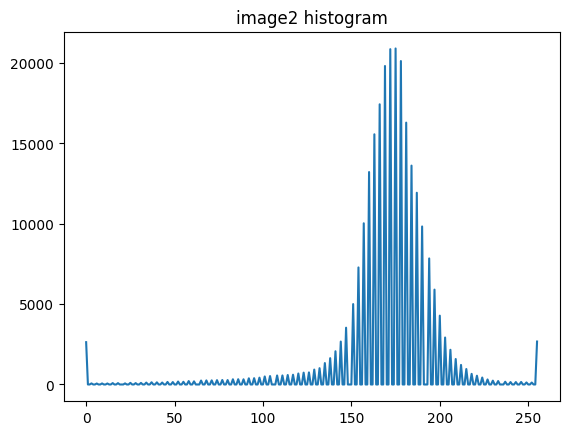

In [16]:
#try your new function and show the result
new_image2 = modified_stretch_hist(image2)
plt.imshow(new_image2,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(new_image2))
plt.title('image2 histogram')



